In [1]:


import matplotlib.pyplot as plt
import seisbench.data as sbd
import seaborn as sns
import pandas as pd

/home/khuzaima/miniforge3/envs/seisbench/lib/python3.13/site-packages/seisbench/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [17]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [2]:
data = sbd.BohemiaSaxony(sample_rate=100.0)

2025-12-02 13:42:01,926 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


In [3]:
data.metadata.columns

Index(['index', 'split', 'source_id', 'source_origin_time',
       'source_origin_uncertainty_sec', 'source_latitude_deg',
       'source_latitude_uncertainty_km', 'source_longitude_deg',
       'source_longitude_uncertainty_km', 'source_depth_km',
       'source_depth_uncertainty_km', 'source_magnitude',
       'source_magnitude_uncertainty', 'source_magnitude_type',
       'source_magnitude_author', 'trace_name', 'path_back_azimuth_deg',
       'station_network_code', 'station_code', 'trace_channel',
       'station_location_code', 'station_latitude_deg',
       'station_longitude_deg', 'station_elevation_m',
       'trace_sampling_rate_hz', 'trace_completeness', 'trace_has_spikes',
       'trace_start_time', 'trace_component_order', 'trace_Pg_arrival_sample',
       'trace_Pg_status', 'trace_Pg_polarity', 'trace_Sg_arrival_sample',
       'trace_Sg_status', 'trace_Sg_polarity', 'trace_name_original',
       'trace_chunk'],
      dtype='object')

In [4]:
metadata = data.metadata

In [5]:
metadata["station_latitude_deg"]

0         50.2874
1         50.3635
2         50.4480
3         50.4150
4         50.2874
           ...   
239275    50.4150
239276    50.3520
239277    50.6072
239278    50.4480
239279    50.2340
Name: station_latitude_deg, Length: 239280, dtype: float64

In [6]:
metadata["station_longitude_deg"]

0         12.37610
1         12.33160
2         12.30700
3         12.46100
4         12.37610
            ...   
239275    12.46100
239276    12.13700
239277    12.52309
239278    12.30700
239279    12.31700
Name: station_longitude_deg, Length: 239280, dtype: float64

In [7]:
event_df = (
    metadata.groupby("source_id")
      .agg({
          "station_network_code": lambda x: list(x.unique()),
          "station_code": lambda x: list(x.unique()),
          "station_latitude_deg": lambda x: list(x.unique()),
          "station_longitude_deg": lambda x: list(x.unique()),
          "source_latitude_deg":"first",
          "source_longitude_deg": "first",
          "source_depth_km": "first",
          "source_magnitude": "first",
          "trace_channel": lambda x: list(x.unique()),
          "split": "first",
          # add whatever summaries you need
      })
      .reset_index()
)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_barh(
    counts, title, xlabel="Count", ylabel="Category",
    figsize=(14, 8), count_display=True, log_scale=True
):
    counts = counts[counts > 0]  # ensure no zeros for log scale
    fig, ax = plt.subplots(figsize=figsize)

    bars = ax.barh(
        counts.index,
        counts.values,
        color=sns.color_palette("husl", len(counts)),
        edgecolor="black",
        linewidth=0.2,
    )

    ax.set_title(title, fontsize=18, pad=30, color="#333333")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    x_max = counts.max()
    ax.set_xlim(right=x_max * 1.15)

    if count_display:
        for bar, (label, value) in zip(bars, counts.items()):
            ax.text(
                bar.get_width() + x_max * 0.01,
                bar.get_y() + bar.get_height() / 2,
                f"{value:,}",
                va="center",
                ha="left",
                fontsize=10,
                fontweight="bold"
            )

    ax.grid(True, axis="x", alpha=0.3, linestyle="--")
    if log_scale:
        ax.set_xscale('log')
    
    plt.tight_layout()
    plt.show()


def plot_bar(
    counts, title, xlabel="Count", ylabel="Category",
    figsize=(12, 6), count_display=True, log_scale=True
):
    counts = counts[counts > 0]  # ensure no zeros for log scale
    fig, ax = plt.subplots(figsize=figsize)

    bars = ax.bar(
        counts.index,
        counts.values,
        color=sns.color_palette("husl", len(counts)),
        edgecolor="black",
        linewidth=0.2
    )

    y_max = counts.max()

    if count_display:
        for bar, value in zip(bars, counts.values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                value + y_max * 0.01,
                f"{value:,}",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold"
            )

    ax.set_title(title, fontsize=18, pad=20, color="#333333")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, axis="y", alpha=0.3, linestyle="--")
    if log_scale:
        ax.set_yscale('log')

    plt.tight_layout()
    plt.show()


In [44]:
split_counts = event_df["split"].value_counts().sort_values(ascending=True)

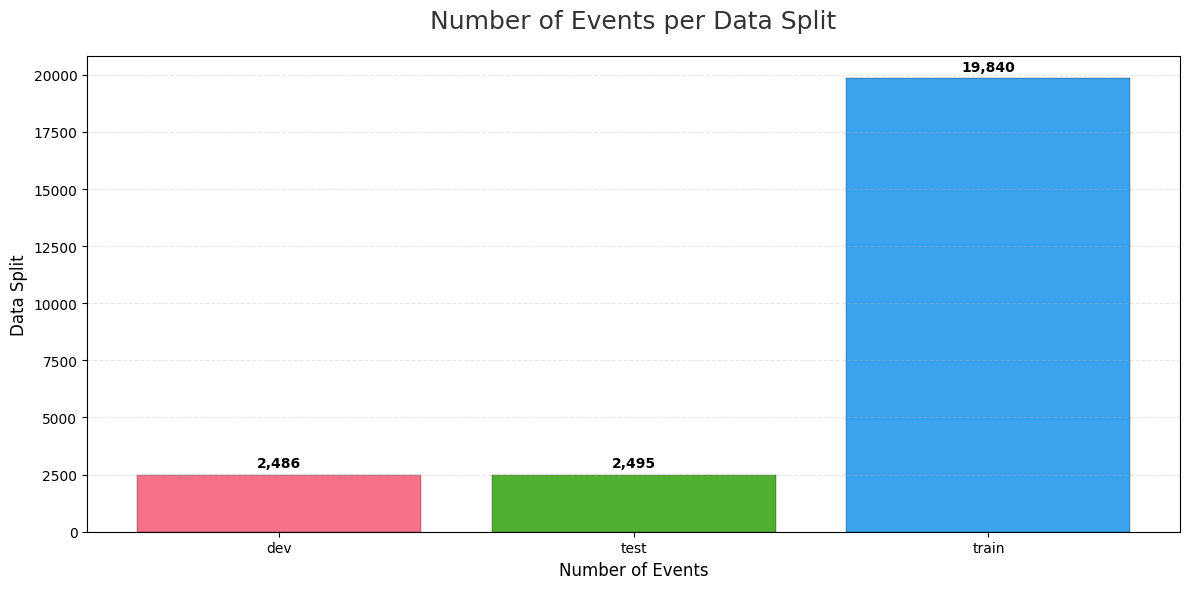

In [48]:
plot_bar(split_counts, "Number of Events per Data Split", xlabel="Number of Events", ylabel="Data Split", count_display=True, log_scale=False)


In [39]:
count_magnitude = event_df["source_magnitude"].value_counts().sort_values(ascending=True)

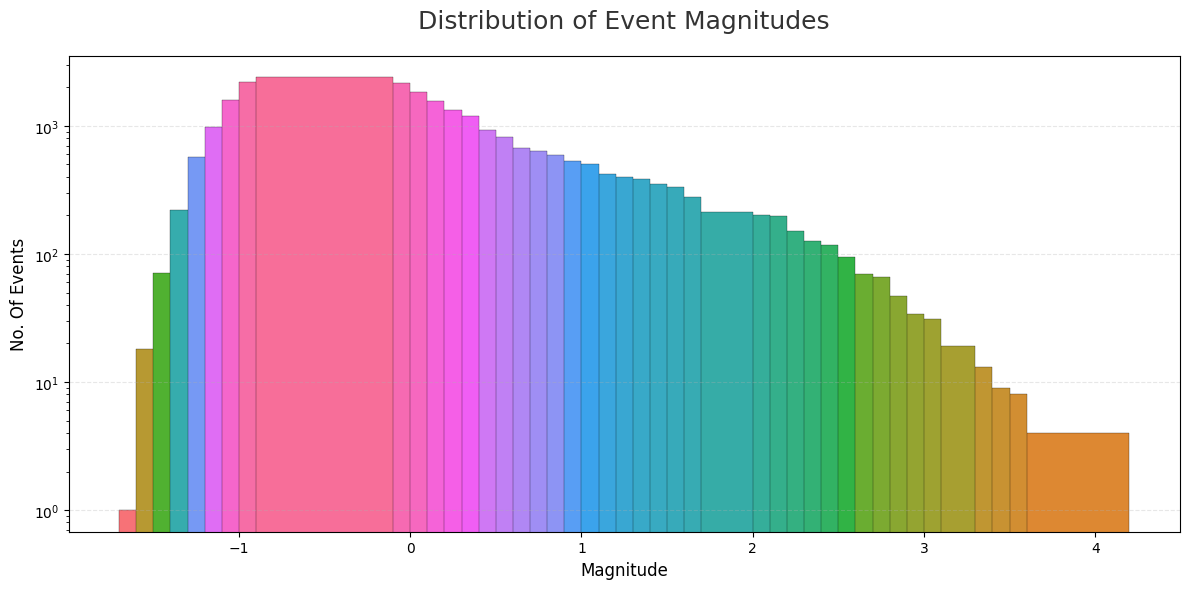

In [45]:
plot_bar(count_magnitude, "Distribution of Event Magnitudes", xlabel="Magnitude", ylabel="No. Of Events", count_display=False, log_scale=True)

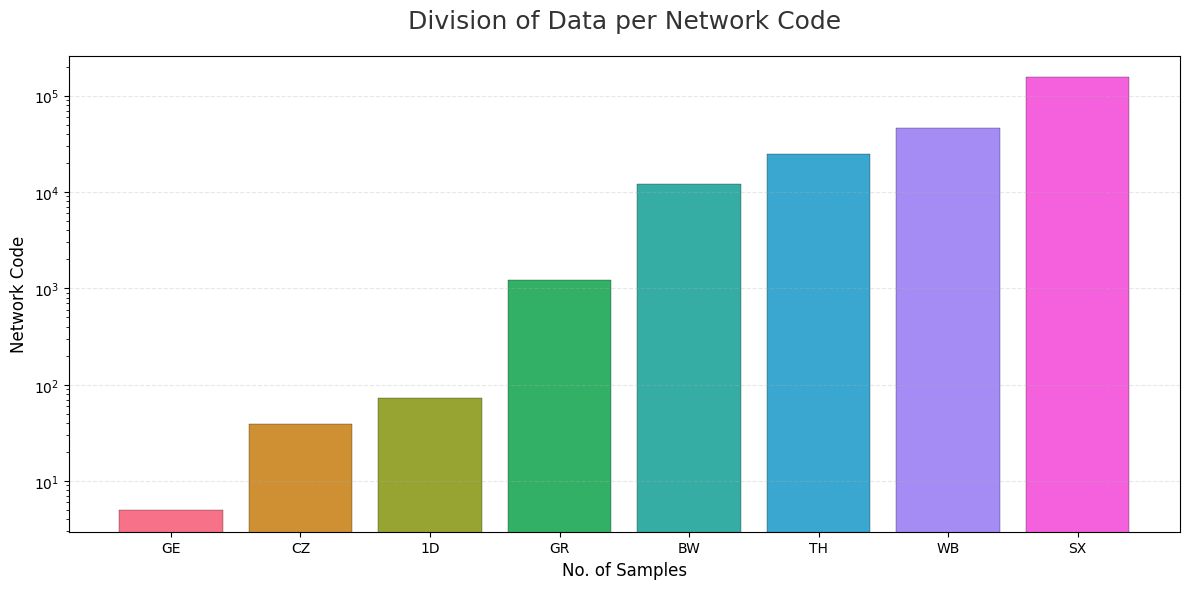

In [46]:


counts_network_stations = metadata.station_network_code.value_counts().sort_values(ascending=True)

plot_bar(
    counts_network_stations,
    "Division of Data per Network Code",
    xlabel="No. of Samples",
    ylabel="Network Code",
    count_display=False
)



In [61]:
channel_abbreviations = {
    "HH": "Broadband High Gain 100Hz",
    "EH": "ShortPeriod High Gain 80-250Hz",
    "CH": "Broadband High Gain 250Hz"

}

In [62]:
metadata["channel_description"] = metadata["trace_channel"].map(channel_abbreviations)

In [63]:
channel_counts = metadata["channel_description"].value_counts()

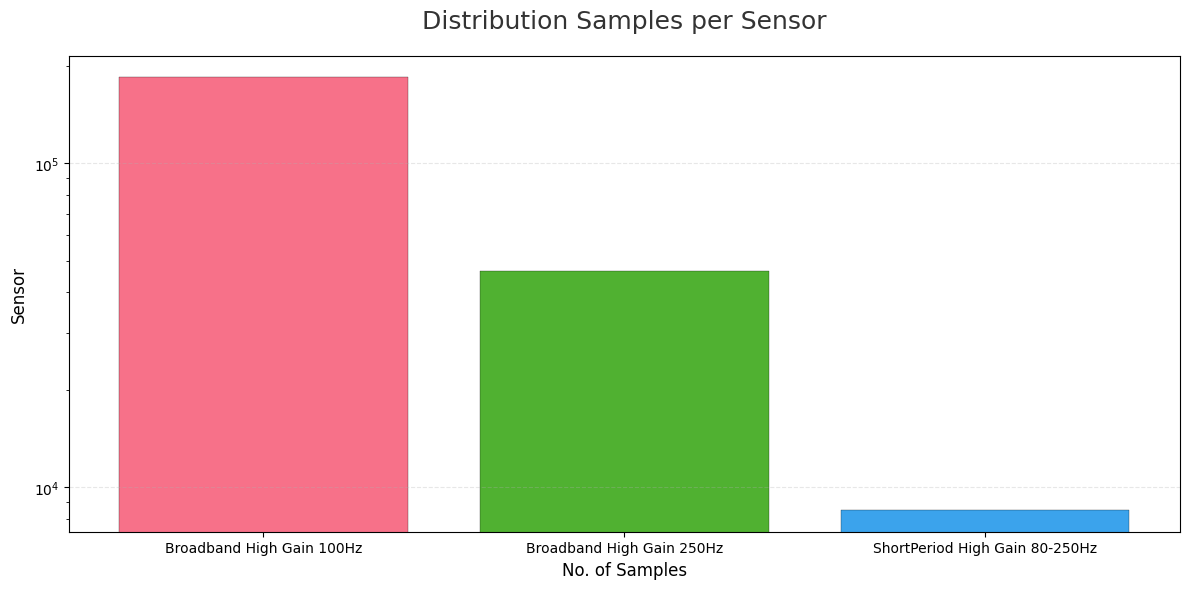

In [65]:
plot_bar(channel_counts, "Distribution Samples per Sensor", xlabel="No. of Samples", ylabel="Sensor", count_display=False, log_scale=True)

In [68]:
metadata.columns

Index(['index', 'split', 'source_id', 'source_origin_time',
       'source_origin_uncertainty_sec', 'source_latitude_deg',
       'source_latitude_uncertainty_km', 'source_longitude_deg',
       'source_longitude_uncertainty_km', 'source_depth_km',
       'source_depth_uncertainty_km', 'source_magnitude',
       'source_magnitude_uncertainty', 'source_magnitude_type',
       'source_magnitude_author', 'trace_name', 'path_back_azimuth_deg',
       'station_network_code', 'station_code', 'trace_channel',
       'station_location_code', 'station_latitude_deg',
       'station_longitude_deg', 'station_elevation_m',
       'trace_sampling_rate_hz', 'trace_completeness', 'trace_has_spikes',
       'trace_start_time', 'trace_component_order', 'trace_Pg_arrival_sample',
       'trace_Pg_status', 'trace_Pg_polarity', 'trace_Sg_arrival_sample',
       'trace_Sg_status', 'trace_Sg_polarity', 'trace_name_original',
       'trace_chunk', 'channel_description'],
      dtype='object')

In [12]:
# Given values
sampling_rate = 20  # Hz (as per your metadata)
waveform_shape = (3, 6000)  # Shape of the waveforms

# Calculate duration per trace
num_samples = waveform_shape[1]
duration = num_samples / sampling_rate  # Duration in seconds

print(f"Duration of each trace: {duration} seconds")

Duration of each trace: 300.0 seconds


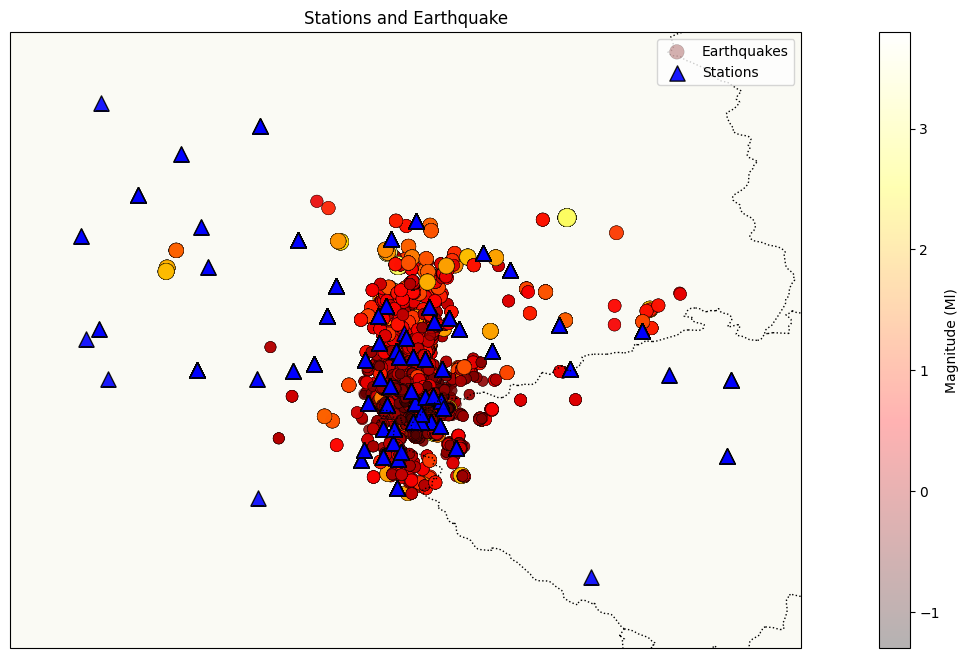

In [80]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


station_lats = metadata['station_latitude_deg']
station_lons = metadata['station_longitude_deg']

eq_lats = metadata['source_latitude_deg']
eq_lons = metadata['source_longitude_deg']
eq_mag = metadata['source_magnitude']  # earthquake magnitudes

# Zoomed extent with padding
pad = 0.5  # smaller pad for tighter zoom
min_lon = min(station_lons.min(), eq_lons.min()) - pad
max_lon = max(station_lons.max(), eq_lons.max()) + pad
min_lat = min(station_lats.min(), eq_lats.min()) - pad
max_lat = max(station_lats.max(), eq_lats.max()) + pad

# Scale marker sizes by magnitude
min_marker = 20
max_marker = 200
sizes = min_marker + (eq_mag - eq_mag.min()) / (eq_mag.max() - eq_mag.min()) * (max_marker - min_marker)

# Create figure
fig = plt.figure(figsize=(20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add basic map features
ax.add_feature(cfeature.LAND, alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot earthquakes first (transparent, magnitude-scaled)
scatter_eq = ax.scatter(
    eq_lons, eq_lats,
    s=sizes,
    c=eq_mag,
    cmap='hot',
    alpha=0.3,
    marker='o',
    edgecolor='k',
    linewidth=0.3,
    transform=ccrs.PlateCarree(),
    label='Earthquakes'
)

# Plot stations on top
ax.scatter(
    station_lons, station_lats,
    s=120,
    marker='^',
    color='blue',
    edgecolor='black',
    alpha=0.9,
    transform=ccrs.PlateCarree(),
    label='Stations'
)

# Add colorbar for magnitude
cbar = plt.colorbar(scatter_eq, ax=ax, orientation='vertical', label='Magnitude (Ml)')


# Legend & title
ax.legend(loc='upper right')
plt.title("Stations and Earthquake")

plt.show()


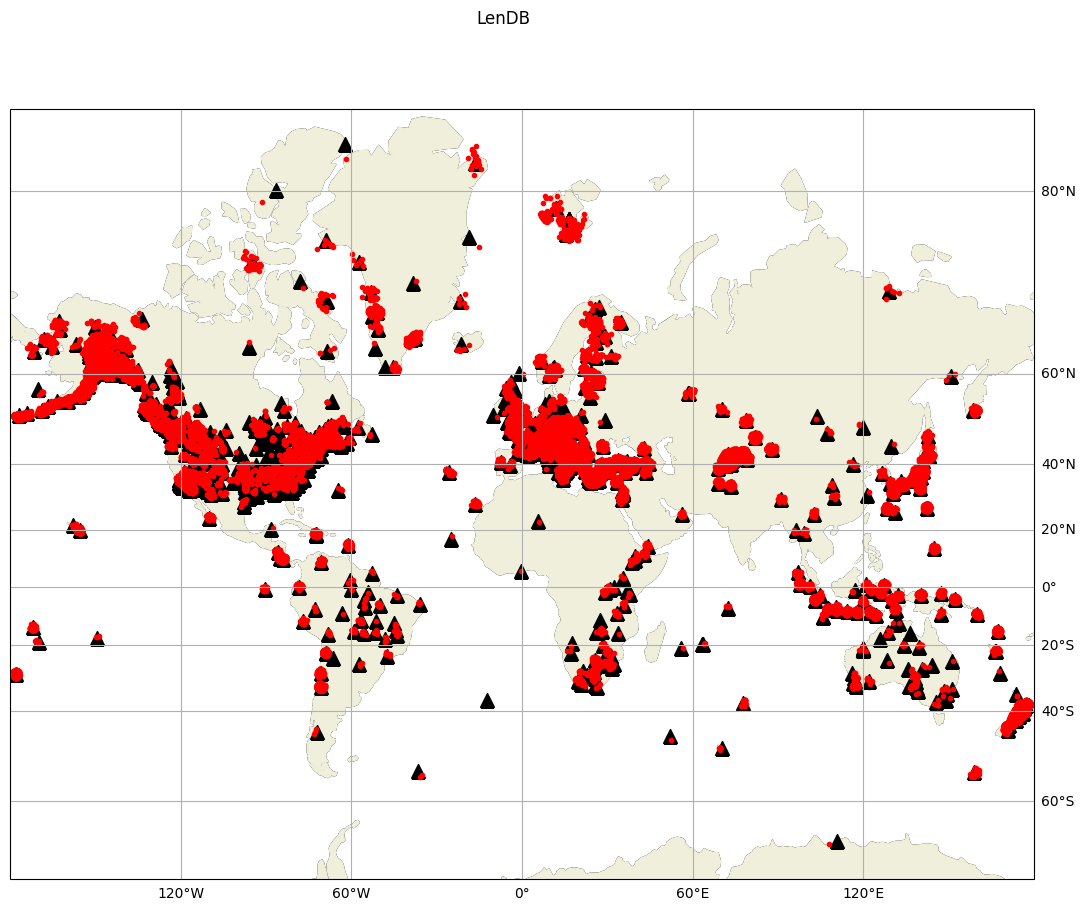

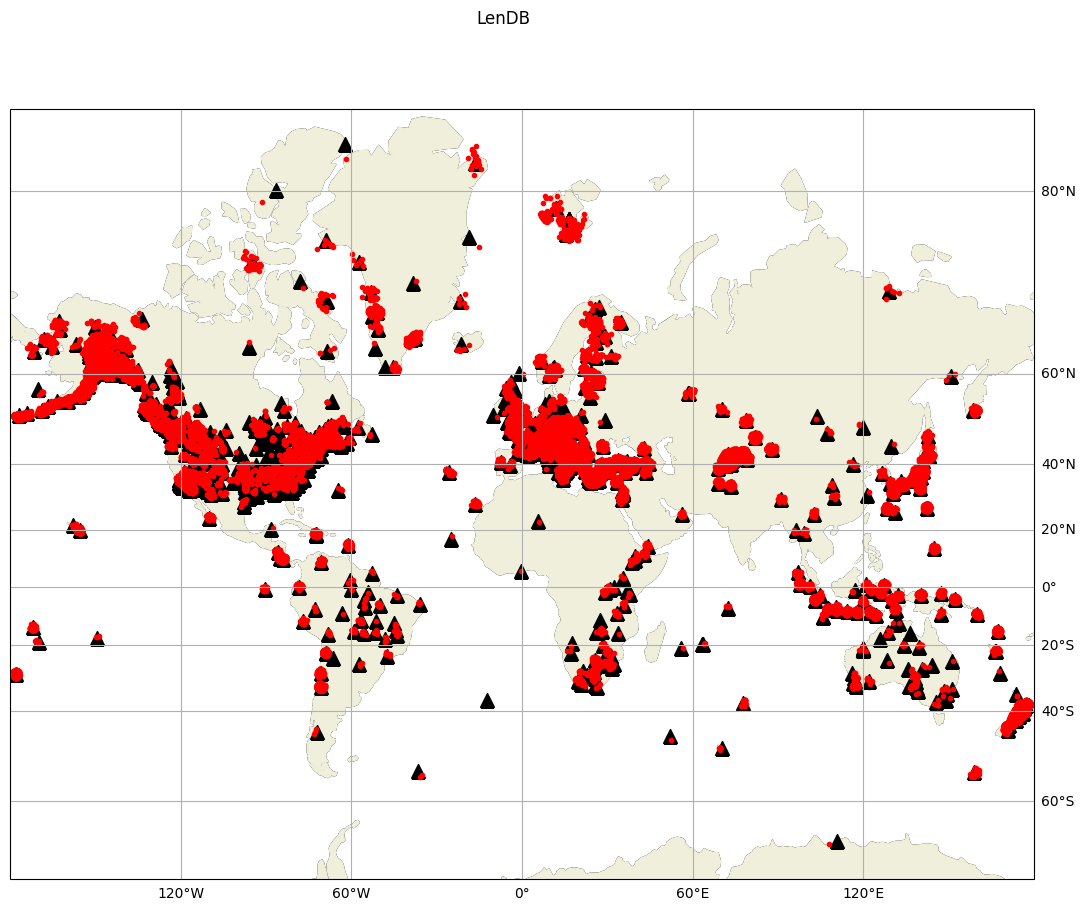

In [7]:
data.plot_map()

In [10]:
import seisbench.generate as sbg
import seisbench.models as sbm
import torch

model = sbm.PhaseNet()

In [4]:
if torch.cuda.is_available():
    model.cuda()
    print("Running on GPU")
else:
    print("Running on CPU")

Running on CPU


In [11]:
train, dev, test = data.train_dev_test()

phase_dict = {
    "trace_p_arrival_sample": "P",
    "trace_pP_arrival_sample": "P",
    "trace_P_arrival_sample": "P",
    "trace_P1_arrival_sample": "P",
    "trace_Pg_arrival_sample": "P",
    "trace_Pn_arrival_sample": "P",
    "trace_PmP_arrival_sample": "P",
    "trace_pwP_arrival_sample": "P",
    "trace_pwPm_arrival_sample": "P",
    "trace_s_arrival_sample": "S",
    "trace_S_arrival_sample": "S",
    "trace_S1_arrival_sample": "S",
    "trace_Sg_arrival_sample": "S",
    "trace_SmS_arrival_sample": "S",
    "trace_Sn_arrival_sample": "S",
}

In [12]:
import numpy as np

train_generator = sbg.GenericGenerator(train)
dev_generator = sbg.GenericGenerator(dev)

augmentations = [
    sbg.WindowAroundSample(
        list(phase_dict.keys()),
        samples_before=3000,
        windowlen=6000,
        selection="random",
        strategy="variable",
    ),
    sbg.RandomWindow(windowlen=3001, strategy="pad"),
    sbg.Normalize(demean_axis=-1, amp_norm_axis=-1, amp_norm_type="peak"),
    sbg.ChangeDtype(np.float32),
    sbg.ProbabilisticLabeller(
        shape="gaussian", label_columns=phase_dict, sigma=30, dim=0
    ),
]

train_generator.add_augmentations(augmentations)
dev_generator.add_augmentations(augmentations)

In [13]:
from seisbench.util import worker_seeding
from torch.utils.data import DataLoader

batch_size = 256
num_workers = 4  # The number of threads used for loading data

train_loader = DataLoader(
    train_generator,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    worker_init_fn=worker_seeding,
)
dev_loader = DataLoader(
    dev_generator,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    worker_init_fn=worker_seeding,
)

In [14]:
learning_rate = 1e-2
epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


def loss_fn(y_pred, y_true, eps=1e-5):
    # vector cross entropy loss
    h = y_true * torch.log(y_pred + eps)
    h = h.mean(-1).sum(-1)  # Mean along sample dimension and sum along pick dimension
    h = h.mean()  # Mean over batch axis
    return -h


def train_loop(dataloader):
    size = len(dataloader.dataset)
    for batch_id, batch in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(batch["X"].to(model.device))
        loss = loss_fn(pred, batch["y"].to(model.device))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_id % 5 == 0:
            loss, current = loss.item(), batch_id * batch["X"].shape[0]
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader):
    num_batches = len(dataloader)
    test_loss = 0

    model.eval()  # close the model for evaluation

    with torch.no_grad():
        for batch in dataloader:
            pred = model(batch["X"].to(model.device))
            test_loss += loss_fn(pred, batch["y"].to(model.device)).item()

    model.train()  # re-open model for training stage

    test_loss /= num_batches
    print(f"Test avg loss: {test_loss:>8f} \n")

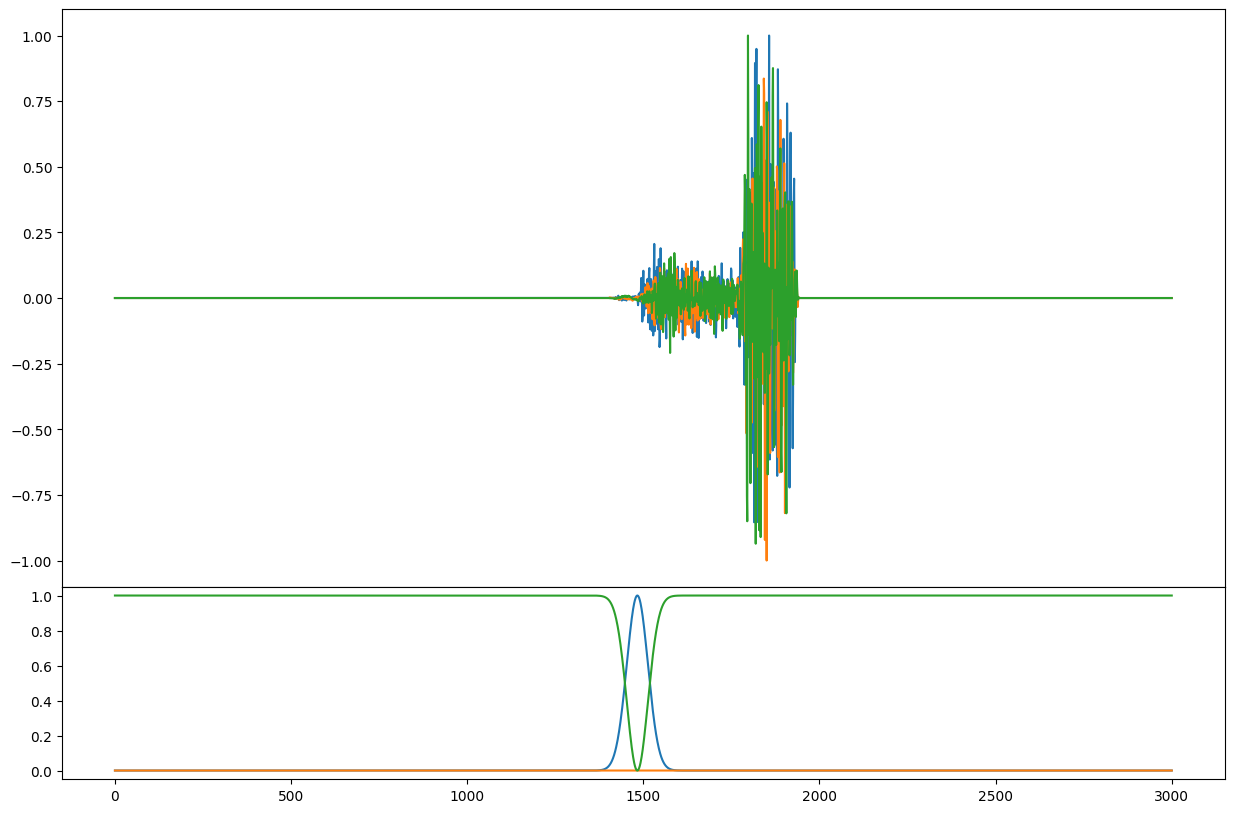

In [16]:
sample = train_generator[np.random.randint(len(train_generator))]

fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(
    2, 1, sharex=True, gridspec_kw={"hspace": 0, "height_ratios": [3, 1]}
)
axs[0].plot(sample["X"].T)
axs[1].plot(sample["y"].T)

In [17]:
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_loader)
    test_loop(dev_loader)

Epoch 1
-------------------------------
loss: 1.529824  [    0/746840]
loss: 1.024244  [ 1280/746840]
loss: 0.735834  [ 2560/746840]
loss: 0.529777  [ 3840/746840]


KeyboardInterrupt: 

{'X': tensor([[[  864.,   862.,   866.,  ...,   650.,   647.,   619.],
         [   94.,    98.,    94.,  ...,   151.,    54.,    53.],
         [  432.,   425.,   410.,  ...,   561.,   495.,   462.]],

        [[  435.,   427.,   415.,  ...,    49.,    11.,    60.],
         [  -65.,   -74.,   -81.,  ...,   -69.,  -130.,   -52.],
         [  474.,   468.,   460.,  ...,   292.,   339.,   384.]],

        [[  207.,   208.,   213.,  ...,   253.,   320.,   402.],
         [ -326.,  -329.,  -331.,  ...,   -50.,  -106.,    -8.],
         [  483.,   488.,   498.,  ...,   407.,   449.,   516.]],

        ...,

        [[  617.,   618.,   621.,  ...,   463.,   393.,   421.],
         [   37.,    36.,    29.,  ...,   -87.,   -11.,    33.],
         [  489.,   505.,   521.,  ...,   289.,   440.,   427.]],

        [[  252.,   254.,   253.,  ...,   825.,   554.,   167.],
         [ -119.,  -112.,  -103.,  ..., -1803.,   436.,  2616.],
         [  669.,   665.,   666.,  ...,  1665.,  1715., -1497.